## Python Mapping: Overview of Racial Makeup in Louisville, KY Using US Census Data

### Table of Contents
<ul>
    <li>Project Summary</li>
    <li>Technical Summary</li>
    <li>Features</li>
    <li>Milestones</li>
    <li>Requirements to run notebook</li>
</ul>

### Project Summary
<hr>
<p>This project involves conducting an exploratory analysis of race within Louisville, KY by census tract</p>

<h3>Technical Summary</h3>
<hr>
<p>Several libraries are used in this project</p>

<details><summary>Click to see list of libraries</summary>
    <ul>
        <li>geopandas</li>
        <li>contextily</li>
        <li>pandas</li>
        <li>matplotlib</li>
    </ul>
</details>

### Problem Statement
<hr>
<p>What is the racial and ethnicity make-up in Louisville, Ky when reviewing by census tract on a spatial level?</p>

In [1]:
# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [2]:
from osgeo import gdal, ogr, osr
from fiona.ogrext import Iterator, ItemsIterator, KeysIterator
from geopandas import GeoDataFrame
gdal.VersionInfo()

'3030100'

In [3]:
# load the geojson data file

gdf = gpd.read_file('data/acs/acs2019_5yr_B03002_14000US21111007501/acs2019_5yr_B03002_14000US21111007501.geojson')

### Exploratory Analysis of File

In [4]:
gdf.shape
print(f"There are {gdf.shape[0]} rows and {gdf.shape[1]} columns")

There are 115 rows and 45 columns


In [5]:
# Reviewing first 5 rows
gdf.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,14000US21111004500,"Census Tract 45, Jefferson, KY",3295.0,248.0,3061.0,263.0,2012.0,274.0,948.0,186.0,...,11.0,0.0,11.0,16.0,18.0,16.0,18.0,0.0,11.0,"MULTIPOLYGON (((-85.80194 38.15540, -85.80164 ..."
1,14000US21111007501,"Census Tract 75.01, Jefferson, KY",5500.0,313.0,5457.0,311.0,5151.0,317.0,27.0,27.0,...,16.0,6.0,9.0,4.0,6.0,0.0,16.0,4.0,6.0,"MULTIPOLYGON (((-85.70476 38.28551, -85.70415 ..."
2,14000US21111007502,"Census Tract 75.02, Jefferson, KY",5663.0,450.0,5546.0,459.0,5096.0,488.0,358.0,254.0,...,16.0,0.0,16.0,14.0,19.0,0.0,16.0,14.0,19.0,"MULTIPOLYGON (((-85.67605 38.30039, -85.67593 ..."
3,14000US21111007700,"Census Tract 77, Jefferson, KY",3429.0,224.0,3312.0,224.0,2941.0,264.0,212.0,140.0,...,11.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,"MULTIPOLYGON (((-85.69603 38.27383, -85.69552 ..."
4,14000US21111009103,"Census Tract 91.03, Jefferson, KY",1563.0,196.0,1386.0,188.0,886.0,163.0,197.0,146.0,...,11.0,6.0,9.0,0.0,11.0,0.0,11.0,0.0,11.0,"MULTIPOLYGON (((-85.76555 38.15263, -85.76551 ..."


In [6]:
# Reviewing random rows
gdf.sample(5)

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
21,14000US21111010314,"Census Tract 103.14, Jefferson, KY",6527.0,446.0,6347.0,446.0,5477.0,444.0,445.0,121.0,...,16.0,0.0,16.0,0.0,16.0,0.0,16.0,0.0,16.0,"MULTIPOLYGON (((-85.54816 38.29761, -85.54803 ..."
23,14000US21111010316,"Census Tract 103.16, Jefferson, KY",4827.0,239.0,4749.0,243.0,4003.0,249.0,350.0,204.0,...,11.0,34.0,52.0,0.0,11.0,0.0,11.0,0.0,11.0,"MULTIPOLYGON (((-85.50332 38.24548, -85.50327 ..."
62,14000US21111011514,"Census Tract 115.14, Jefferson, KY",3270.0,256.0,3200.0,252.0,2731.0,249.0,289.0,155.0,...,11.0,38.0,66.0,0.0,11.0,0.0,11.0,0.0,11.0,"MULTIPOLYGON (((-85.63533 38.13090, -85.63532 ..."
107,14000US21111012604,"Census Tract 126.04, Jefferson, KY",5426.0,646.0,5140.0,768.0,2368.0,469.0,2732.0,593.0,...,16.0,0.0,16.0,0.0,16.0,0.0,16.0,0.0,16.0,"MULTIPOLYGON (((-85.85464 38.18446, -85.85433 ..."
110,14000US21111012703,"Census Tract 127.03, Jefferson, KY",6439.0,620.0,6047.0,595.0,4564.0,562.0,1169.0,380.0,...,16.0,381.0,572.0,0.0,16.0,0.0,16.0,0.0,16.0,"MULTIPOLYGON (((-85.90924 38.14348, -85.90913 ..."


<AxesSubplot:>

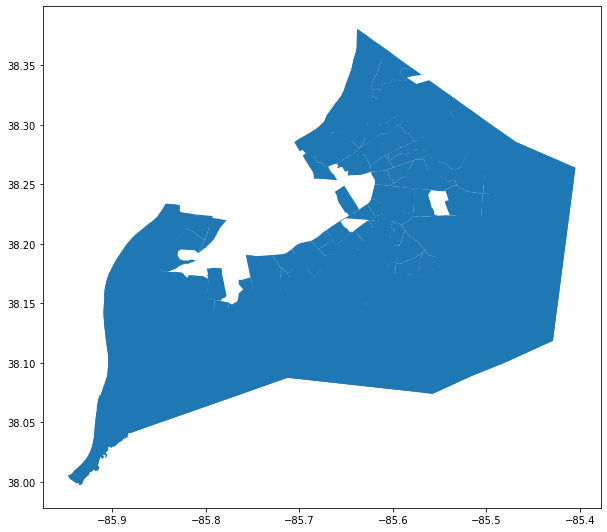

In [7]:
# Reviewing the plots
gdf.plot(figsize=(10,10))

<AxesSubplot:>

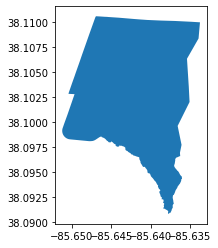

In [8]:
# Plotting a random census tract
gdf.sample().plot()

### Reviewing the data types within the file

In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             115 non-null    object  
 1   name              115 non-null    object  
 2   B03002001         115 non-null    float64 
 3   B03002001, Error  115 non-null    float64 
 4   B03002002         115 non-null    float64 
 5   B03002002, Error  115 non-null    float64 
 6   B03002003         115 non-null    float64 
 7   B03002003, Error  115 non-null    float64 
 8   B03002004         115 non-null    float64 
 9   B03002004, Error  115 non-null    float64 
 10  B03002005         115 non-null    float64 
 11  B03002005, Error  115 non-null    float64 
 12  B03002006         115 non-null    float64 
 13  B03002006, Error  115 non-null    float64 
 14  B03002007         115 non-null    float64 
 15  B03002007, Error  115 non-null    float64 
 16  B03002008         

In [10]:
# Looking at the geo_id
gdf.geoid.head()

0    14000US21111004500
1    14000US21111007501
2    14000US21111007502
3    14000US21111007700
4    14000US21111009103
Name: geoid, dtype: object

### GEO.ID Interpretation
<ul>
    <li>14000 = Summary Level of Data</li>
    <li>US = Country</li>
    <li>21 = State</li>
    <li>111 = County</li>
    <li>004500 = Census Tract</li>
</ul>

### Data Cleaning
<ul>
    <li>Removing unnecessary columns</li>
</ul>


In [11]:
list(gdf)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [17]:
columns_to_keep = [
    'geoid'
    ,'name'
    , 'B03002001'
    , 'B03002002'
    , 'B03002003'
    , 'B03002004'
    , 'B03002005'
    , 'B03002006'
    , 'B03002007'
    , 'B03002008'
    , 'B03002009'
    , 'B03002012'
    , 'geometry'
]

In [18]:
# redefine dataframe keeping only columns of interest
gdf = gdf[columns_to_keep]

In [19]:
gdf.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
0,14000US21111004500,"Census Tract 45, Jefferson, KY",3295.0,3061.0,2012.0,948.0,0.0,18.0,0.0,21.0,62.0,234.0,"MULTIPOLYGON (((-85.80194 38.15540, -85.80164 ..."
1,14000US21111007501,"Census Tract 75.01, Jefferson, KY",5500.0,5457.0,5151.0,27.0,0.0,191.0,0.0,23.0,65.0,43.0,"MULTIPOLYGON (((-85.70476 38.28551, -85.70415 ..."
2,14000US21111007502,"Census Tract 75.02, Jefferson, KY",5663.0,5546.0,5096.0,358.0,0.0,78.0,0.0,0.0,14.0,117.0,"MULTIPOLYGON (((-85.67605 38.30039, -85.67593 ..."
3,14000US21111007700,"Census Tract 77, Jefferson, KY",3429.0,3312.0,2941.0,212.0,0.0,128.0,0.0,0.0,31.0,117.0,"MULTIPOLYGON (((-85.69603 38.27383, -85.69552 ..."
4,14000US21111009103,"Census Tract 91.03, Jefferson, KY",1563.0,1386.0,886.0,197.0,25.0,262.0,0.0,0.0,16.0,177.0,"MULTIPOLYGON (((-85.76555 38.15263, -85.76551 ..."


### Dropping county total population row

In [20]:
# Check last row to make sure it's the county total, this is not needed when plotting
gdf.tail()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
109,14000US21111012702,"Census Tract 127.02, Jefferson, KY",1965.0,1839.0,1444.0,321.0,0.0,0.0,0.0,0.0,74.0,126.0,"MULTIPOLYGON (((-85.89354 38.18901, -85.89267 ..."
110,14000US21111012703,"Census Tract 127.03, Jefferson, KY",6439.0,6047.0,4564.0,1169.0,22.0,0.0,0.0,40.0,252.0,392.0,"MULTIPOLYGON (((-85.90924 38.14348, -85.90913 ..."
111,14000US21111012801,"Census Tract 128.01, Jefferson, KY",2934.0,2836.0,347.0,2383.0,0.0,6.0,0.0,0.0,100.0,98.0,"MULTIPOLYGON (((-85.82054 38.21298, -85.81943 ..."
112,14000US21111012802,"Census Tract 128.02, Jefferson, KY",2419.0,2158.0,542.0,1489.0,0.0,9.0,0.0,0.0,118.0,261.0,"MULTIPOLYGON (((-85.80782 38.19239, -85.80757 ..."
113,14000US21111980100,"Census Tract 9801, Jefferson, KY",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-85.75715 38.19033, -85.75705 ..."


In [16]:
# Dropping last row (114) as it is not needed and will skew results if kept
gdf = gdf.drop([114])

#Checking after dropping last row
gdf.tail()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002010,B03002011,B03002012,geometry
109,14000US21111012702,"Census Tract 127.02, Jefferson, KY",1965.0,1839.0,1444.0,321.0,0.0,0.0,0.0,0.0,74.0,0.0,74.0,126.0,"MULTIPOLYGON (((-85.89354 38.18901, -85.89267 ..."
110,14000US21111012703,"Census Tract 127.03, Jefferson, KY",6439.0,6047.0,4564.0,1169.0,22.0,0.0,0.0,40.0,252.0,0.0,252.0,392.0,"MULTIPOLYGON (((-85.90924 38.14348, -85.90913 ..."
111,14000US21111012801,"Census Tract 128.01, Jefferson, KY",2934.0,2836.0,347.0,2383.0,0.0,6.0,0.0,0.0,100.0,0.0,100.0,98.0,"MULTIPOLYGON (((-85.82054 38.21298, -85.81943 ..."
112,14000US21111012802,"Census Tract 128.02, Jefferson, KY",2419.0,2158.0,542.0,1489.0,0.0,9.0,0.0,0.0,118.0,0.0,118.0,261.0,"MULTIPOLYGON (((-85.80782 38.19239, -85.80757 ..."
113,14000US21111980100,"Census Tract 9801, Jefferson, KY",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-85.75715 38.19033, -85.75705 ..."


### Renaming Columns

In [21]:
gdf.columns = ["geoid"
    , "name"
    , "Total"
    , "Non-Hispanic"
    , "White"
    , "Black"
    , "AI/AN"
    , "Asian"
    , "HI/PI"
    , "Other"
    , "2+ Races"
    , "Hispanic"
    , "geometry"
]

In [22]:
gdf.head()

,geoid,name,Total,Non-Hispanic,White,Black,AI/AN,Asian,HI/PI,Other,2+ Races,Hispanic,geometry
0,14000US21111004500,"Census Tract 45, Jefferson, KY",3295.0,3061.0,2012.0,948.0,0.0,18.0,0.0,21.0,62.0,234.0,"MULTIPOLYGON (((-85.80194 38.15540, -85.80164 ..."
1,14000US21111007501,"Census Tract 75.01, Jefferson, KY",5500.0,5457.0,5151.0,27.0,0.0,191.0,0.0,23.0,65.0,43.0,"MULTIPOLYGON (((-85.70476 38.28551, -85.70415 ..."
2,14000US21111007502,"Census Tract 75.02, Jefferson, KY",5663.0,5546.0,5096.0,358.0,0.0,78.0,0.0,0.0,14.0,117.0,"MULTIPOLYGON (((-85.67605 38.30039, -85.67593 ..."
3,14000US21111007700,"Census Tract 77, Jefferson, KY",3429.0,3312.0,2941.0,212.0,0.0,128.0,0.0,0.0,31.0,117.0,"MULTIPOLYGON (((-85.69603 38.27383, -85.69552 ..."
4,14000US21111009103,"Census Tract 91.03, Jefferson, KY",1563.0,1386.0,886.0,197.0,25.0,262.0,0.0,0.0,16.0,177.0,"MULTIPOLYGON (((-85.76555 38.15263, -85.76551 ..."


In [29]:
# Double checking math and totals
# Checking a random census tract
random_tract = gdf.sample()
random_tract

,geoid,name,Total,Non-Hispanic,White,Black,AI/AN,Asian,HI/PI,Other,2+ Races,Hispanic,geometry
103,14000US21111012411,"Census Tract 124.11, Jefferson, KY",6789.0,6689.0,5348.0,865.0,0.0,224.0,0.0,215.0,37.0,100.0,"MULTIPOLYGON (((-85.88378 38.14540, -85.88377 ..."


In [30]:
print(f"Total Population: {random_tract.iloc[0]['Total']}")

print(f"""Adding Each Race Pop Total: 
{random_tract.iloc[0]['White'] 
+ random_tract.iloc[0]['Black'] 
+ random_tract.iloc[0]['AI/AN']
+ random_tract.iloc[0]['Asian']
+ random_tract.iloc[0]['HI/PI']
+ random_tract.iloc[0]['Other']
+ random_tract.iloc[0]['2+ Races']
+ random_tract.iloc[0]['Hispanic']
}
""")

# Checking Non-Hispanic + Hispanic Totals
print(f"""
Non-Hispanic: {random_tract.iloc[0]['Non-Hispanic']}
Hispanic: {random_tract.iloc[0]['Hispanic']}
Adding Both: {random_tract.iloc[0]['Non-Hispanic'] + random_tract.iloc[0]['Hispanic']}
Total from Column: {random_tract.iloc[0]['Total']}
""")

Total Population: 6789.0
Adding Each Race Pop Total: 
6789.0


Non-Hispanic: 6689.0
Hispanic: 100.0
Adding Both: 6789.0
Total from Column: 6789.0



In [31]:
# Descriptive Stats
print(f"The median population size is: {gdf['Total'].median()}")
print(gdf['Total'].describe())

The median population size is: 4734.5
count     114.000000
mean     4638.412281
std      1663.999621
min         0.000000
25%      3450.500000
50%      4734.500000
75%      5680.250000
max      8307.000000
Name: Total, dtype: float64


<AxesSubplot:title={'center':'Louisville, Jefferson County Census Tract by Population Size, ACS 2019 5-year'}, ylabel='Frequency'>

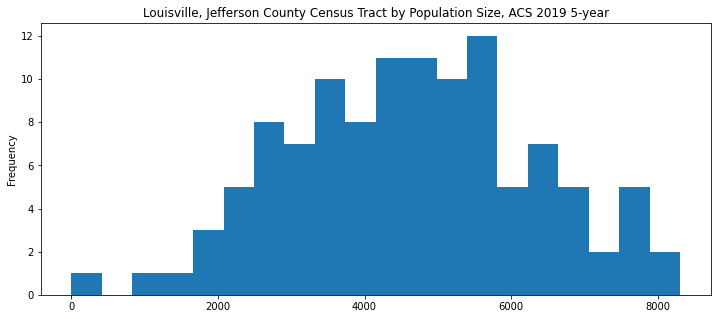

In [43]:
gdf['Total'].plot.hist(figsize=(12,5),
                       bins=20,
                       title='Louisville, Jefferson County Census Tract by Population Size, ACS 2019 5-year'
                      )

In [44]:
# Top 10 most populated census tract in Louisville, KY?
gdf_sorted = gdf.sort_values(by='Total', ascending=False)

In [45]:
gdf_sorted[['geoid', 'Total']].head(10)

,geoid,Total
92,14000US21111012106,8307.0
52,14000US21111011302,8138.0
18,14000US21111010311,7854.0
69,14000US21111011601,7837.0
83,14000US21111011905,7621.0
57,14000US21111011505,7602.0
16,14000US21111010307,7483.0
43,14000US21111011106,7386.0
42,14000US21111011102,7081.0
106,14000US21111012601,7022.0


<AxesSubplot:>

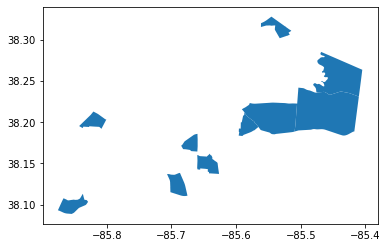

In [46]:
# Plotting the top 10 most populated census tracts
gdf_sorted.head(10).plot()

Text(0.5, 1.0, 'Louisville, Ky Population Count by Census Tract, ACS 2019 5-year')

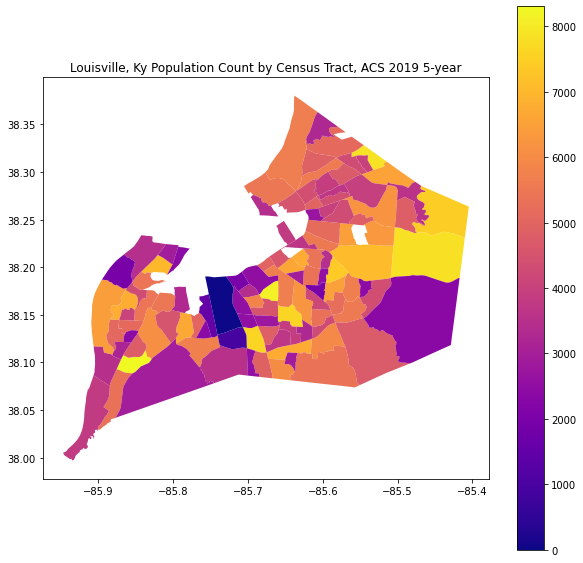

In [47]:
# Reviewing all census tracts and their population size density
gdf_sorted.plot(figsize=(10,10),
               column='Total',
               cmap='plasma',
               legend=True,
               )

plt.title("Louisville, Ky Population Count by Census Tract, ACS 2019 5-year")

In [48]:
# Census tracts with no people

gdf_no_pop = gdf[gdf['Total']==0]
print('Total number of census tracts with no people: ' + str(len(gdf_no_pop)))

Total number of census tracts with no people: 1


In [49]:
# Normalizing the data by converting them to percentages
list(gdf)

['geoid',
 'name',
 'Total',
 'Non-Hispanic',
 'White',
 'Black',
 'AI/AN',
 'Asian',
 'HI/PI',
 'Other',
 '2+ Races',
 'Hispanic',
 'geometry']

In [50]:
# Create and calculate a percentage column for each race
# Creating a for loop by identify all race count columns and calculating the percentage for each column selected
for race_eth in gdf.columns[4:12]:
    gdf[f'Percent {race_eth}'] = gdf[race_eth]/gdf['Total']*100

gdf.head()

,geoid,name,Total,Non-Hispanic,White,Black,AI/AN,Asian,HI/PI,Other,...,Hispanic,geometry,Percent White,Percent Black,Percent AI/AN,Percent Asian,Percent HI/PI,Percent Other,Percent 2+ Races,Percent Hispanic
0,14000US21111004500,"Census Tract 45, Jefferson, KY",3295.0,3061.0,2012.0,948.0,0.0,18.0,0.0,21.0,...,234.0,"MULTIPOLYGON (((-85.80194 38.15540, -85.80164 ...",61.062215,28.770865,0.000000,0.546282,0.0,0.637329,1.881639,7.101669
1,14000US21111007501,"Census Tract 75.01, Jefferson, KY",5500.0,5457.0,5151.0,27.0,0.0,191.0,0.0,23.0,...,43.0,"MULTIPOLYGON (((-85.70476 38.28551, -85.70415 ...",93.654545,0.490909,0.000000,3.472727,0.0,0.418182,1.181818,0.781818
2,14000US21111007502,"Census Tract 75.02, Jefferson, KY",5663.0,5546.0,5096.0,358.0,0.0,78.0,0.0,0.0,...,117.0,"MULTIPOLYGON (((-85.67605 38.30039, -85.67593 ...",89.987639,6.321738,0.000000,1.377362,0.0,0.000000,0.247219,2.066043
3,14000US21111007700,"Census Tract 77, Jefferson, KY",3429.0,3312.0,2941.0,212.0,0.0,128.0,0.0,0.0,...,117.0,"MULTIPOLYGON (((-85.69603 38.27383, -85.69552 ...",85.768446,6.182561,0.000000,3.732867,0.0,0.000000,0.904054,3.412073
4,14000US21111009103,"Census Tract 91.03, Jefferson, KY",1563.0,1386.0,886.0,197.0,25.0,262.0,0.0,0.0,...,177.0,"MULTIPOLYGON (((-85.76555 38.15263, -85.76551 ...",56.685861,12.603967,1.599488,16.762636,0.0,0.000000,1.023672,11.324376


In [51]:
list(gdf)

['geoid',
 'name',
 'Total',
 'Non-Hispanic',
 'White',
 'Black',
 'AI/AN',
 'Asian',
 'HI/PI',
 'Other',
 '2+ Races',
 'Hispanic',
 'geometry',
 'Percent White',
 'Percent Black',
 'Percent AI/AN',
 'Percent Asian',
 'Percent HI/PI',
 'Percent Other',
 'Percent 2+ Races',
 'Percent Hispanic']

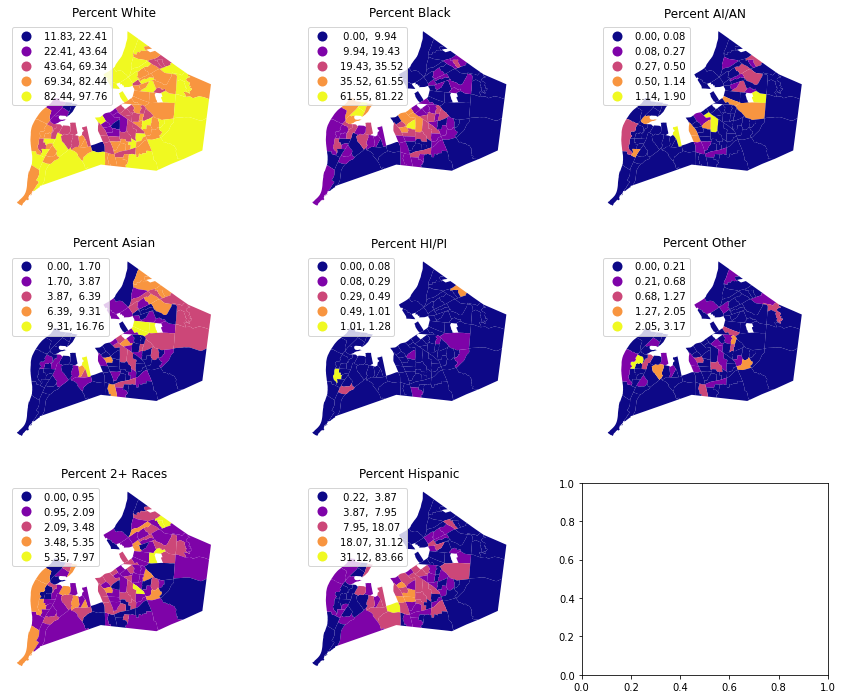

In [59]:
# Looking at population size by census tract and race/ethnicity
# Automating the creation of subplots
# Defining figure and number of subplots by row and column
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15,12))

# Defining an iterator variable and an axes list to help cycle through each race category
i=0
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

# For loop iterates through each race percent category and plots a subplot for each as well
for race_pct in gdf.columns[13:21]:
    gdf.plot(column=race_pct,
        cmap='plasma',
        scheme='NaturalBreaks',
        ax=ax_list[i],
        legend=True,
        legend_kwds={'loc': 'upper left'})
    ax_list[i].axis("off")
    ax_list[i].set_title(race_pct)
    i = i + 1